(96,)
0     103
1      91
2      76
3      72
4      80
     ... 
91    102
92     84
93     74
94     79
95    108
Name: 0, Length: 96, dtype: int64


<AxesSubplot:>

<Figure size 720x576 with 0 Axes>

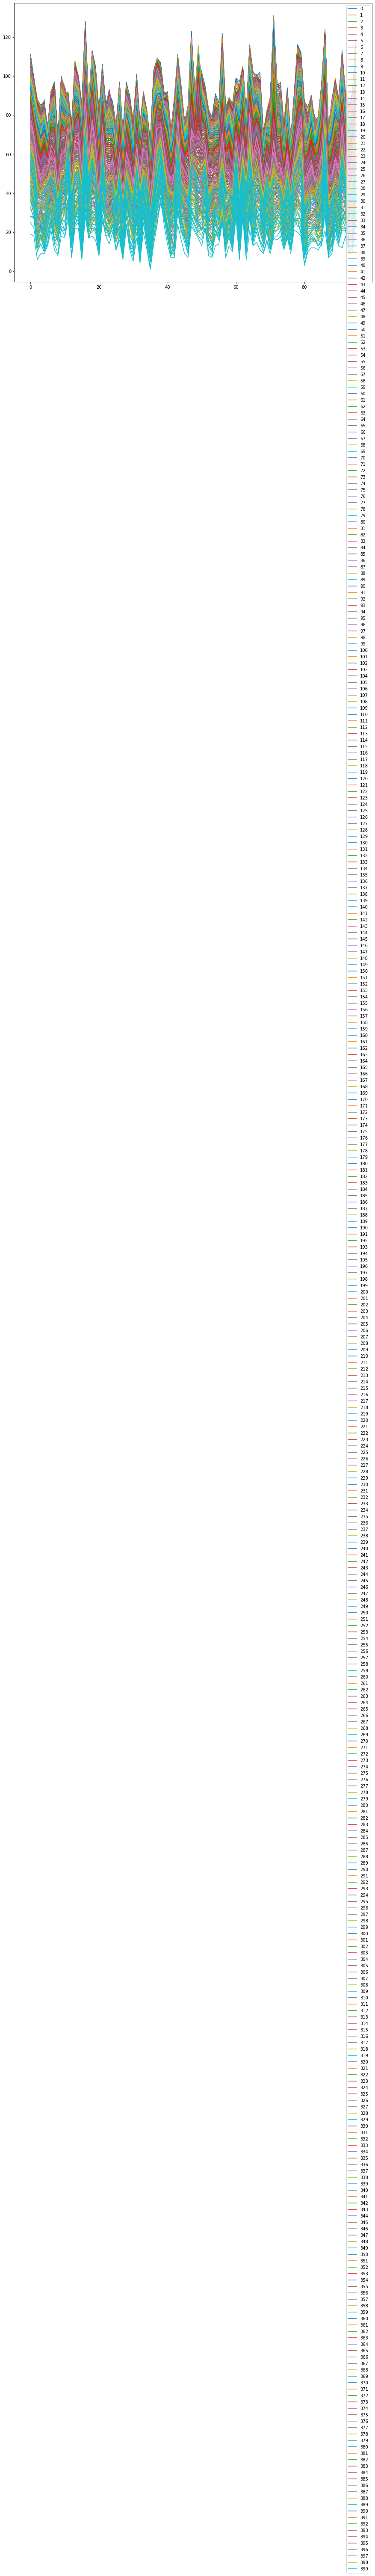

In [9]:
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

png_list=glob.glob("/Users/ShuntaroMiwa/parking_level1/*.jpg")
#png_listに格納されたファイル名を順にpng_file_nameに取り出し、繰り返す

# for png_file_name in png_list:
#     #画像を読み込む
#     img = cv.imread(png_file_name)
#     #座標(661, 267)の画素の青成分の明るさを表示
#     print(img[387][239][2])#96行

data_list_b = []
data_list_g = []
data_list_r = []
for png_file_name in png_list:
    img = cv.imread( png_file_name )
    data_list_b.append( img[400:420,224:244,0] )#96*20*20,400:420,224:244
    data_list_g.append( img[400:420,224:244,1] )
    data_list_r.append( img[400:420,224:244,2] )

data_list_b = np.array(data_list_b) 
data_list_g =  np.array(data_list_g)   
data_list_r =  np.array(data_list_r) 

# print(np.shape(data_list_b[:,0,0]))
# print(data_list_b[:,0,0])
    
data_list_b2= []#加工
data_list_g2 = []
data_list_r2 = []    
    
for i in range(20):
    for j in range(20):
        data_list_b2.append(data_list_b[:,i,j])

for i in range(20):
    for j in range(20):
        data_list_g2.append(data_list_g[:,i,j])

for i in range(20):
    for j in range(20):
        data_list_r2.append(data_list_r[:,i,j])
        
data_list_b2 =  pd.DataFrame(data_list_b2).T
data_list_g2 =  np.array(data_list_g2)   
data_list_r2 =  np.array(data_list_r2) 

print(np.shape(data_list_b2[0]))
print(data_list_b2[0])

plt.figure(figsize=(10, 8))
data_list_b2.plot(figsize=(15,12))
#plt.plot=(data_list_b2)

# print(np.shape(data_list_b))
# print(type(data_list_b))

# import csv
# #ファイルをオープンして書き込み準備
# f = open('color_1385_480.csv','w', encoding='UTF-8')
# writer = csv.writer(f, lineterminator='¥n')
# #data_list_bをファイルに書き出し
# writer.writerow(data_list_b)
# #data_list_gをファイルに書き出し
# writer.writerow(data_list_g)
# #data_list_rをファイルに書き出し
# writer.writerow(data_list_r)
# #ファイルをクローズして完了
# f.close()

In [1]:
#2つの画像のヒストグラムマッチング
#https://cloud6.net/so/python/282369
    
import numpy as np
import cv2

def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()#多次元のリストを1次元のリストにする
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)#３つ変数を作成（一意の値、一意の値の場所、一意の値の頻度）
    t_values, t_counts = np.unique(template, return_counts=True)
    #print(np.shape(bin_idx))#shape=518400
    
    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)　それぞれの累積分布関数を得る
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    #print(s_quantiles)追加
    s_quantiles /= s_quantiles[-1]# s_quantiles = s_quantiles/s_quantiles[-1]（逆行列（単位行列にする行列））
    #print(s_quantiles)追加
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)#sourceにおける明度値をtemplateの明度で補間
    #print(interp_t_values)#shape=256
#     print(interp_t_values)
#     print(bin_idx)
#     print(interp_t_values[bin_idx])
    
    return interp_t_values[bin_idx].reshape(oldshape)#sourceの一意の値に代入？し、oldshapeの形に変換。

In [24]:
#画像のコントラスト及び明るさを他の画像に似せる
import cv2
import glob
from matplotlib import pyplot as plt

png_list=glob.glob("/Users/ShuntaroMiwa/parking_level1/*.jpg")

template2 = cv2.imread("/Users/ShuntaroMiwa/parking_level1/2018-1011-11-55-07.jpg")

height, width, channel = template2.shape
#print(channel)
path="/Users/ShuntaroMiwa/parking_standardized/"
input_dir="image"
output_dir="result"

for png_file_name in png_list:
    source2 = cv2.imread( png_file_name )
    source3 = cv2.imread( png_file_name )
    #source = np.array(source)
    #print(np.shape(source[:,:,i]))
    for i in range(channel):
        print(png_file_name)
        source = source2[:,:,i]
        template = template2[:,:,i]
        matched = hist_match(source, template)
        source3[:,:,i]= matched
        filename = png_file_name.rsplit("1/")[1]
        print(filename)
        #出力する画像ファイルのフルパスを作成する
        outputimage = path + filename
        cv2.imwrite(outputimage, source3,  [cv2.IMWRITE_JPEG_QUALITY, 100])

/Users/ShuntaroMiwa/parking_level1/2018-1011-11-35-06.jpg
2018-1011-11-35-06.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1011-11-35-06.jpg
2018-1011-11-35-06.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1011-11-35-06.jpg
2018-1011-11-35-06.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1015-11-20-07.jpg
2018-1015-11-20-07.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1015-11-20-07.jpg
2018-1015-11-20-07.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1015-11-20-07.jpg
2018-1015-11-20-07.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1023-13-50-12.jpg
2018-1023-13-50-12.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1023-13-50-12.jpg
2018-1023-13-50-12.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1023-13-50-12.jpg
2018-1023-13-50-12.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1010-10-40-04.jpg
2018-1010-10-40-04.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1010-10-40-04.jpg
2018-1010-10-40-04.jpg
/Users/ShuntaroMiwa/parking_level1/2018-1010-10-40-04.jpg
2018-1010-10-40-04.jpg
/Users/ShuntaroMiwa/parking_

[[[ 31 187 255 ... 147 148 152]
  [255 252 252 ... 163 157 156]
  [250 248 243 ... 161 158 159]
  ...
  [ 78  86 107 ... 232 255 215]
  [216 166  79 ... 142 184 137]
  [201 230 187 ... 140 172 192]]

 [[255 255 237 ... 130 125 129]
  [251 251 254 ... 129 126 125]
  [255 242 239 ... 105 127 130]
  ...
  [223 194  52 ... 151  94 114]
  [186 232 219 ... 117 157 133]
  [ 16 121 243 ...  90  36  10]]

 [[ 23 143 255 ... 148 152 156]
  [255 255 255 ... 158 151 153]
  [255 255 255 ... 149 153 151]
  ...
  [ 72  64  91 ... 255 255 252]
  [238 168  53 ... 172 119  64]
  [209 255 209 ...  67 102 160]]

 ...

 [[ 28  18  45 ... 255 101  27]
  [  5   4  95 ... 255 255 113]
  [ 35 251 255 ... 254 255 255]
  ...
  [ 97 122 175 ... 210 184 175]
  [100  98 101 ... 138 128 155]
  [ 91 109  94 ... 238 255 255]]

 [[ 15 133 255 ... 138 153 146]
  [255 255 255 ... 147 142 144]
  [255 255 255 ... 137 141 142]
  ...
  [ 82  45  82 ... 255 255 255]
  [221 165  53 ... 185 131  70]
  [202 254 217 ...  79 104 1

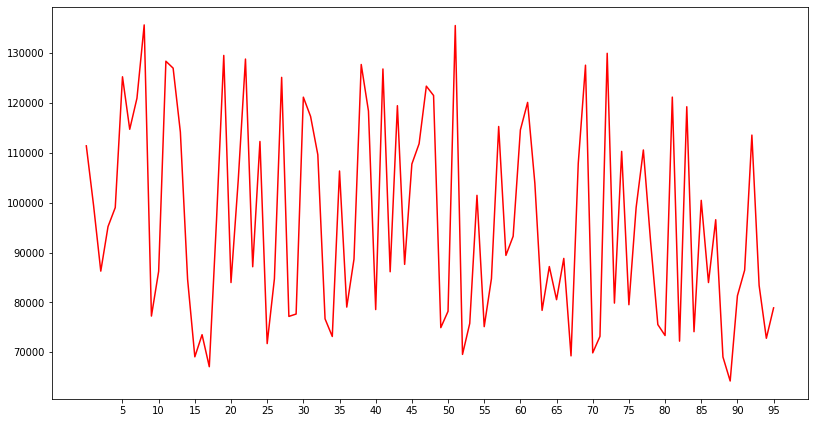

In [9]:
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

png_list=glob.glob("/Users/ShuntaroMiwa/parking_standardized/*.jpg")
#png_listに格納されたファイル名を順にpng_file_nameに取り出し、繰り返す

# for png_file_name in png_list:
#     #画像を読み込む
#     img = cv.imread(png_file_name)
#     #座標(661, 267)の画素の青成分の明るさを表示
#     print(img[387][239][2])#96行

data_list_b = []
data_list_g = []
data_list_r = []
comp_list_b = []
comp_list_g = []
comp_list_r = []
for png_file_name in png_list:
    img = cv.imread( png_file_name )
    #print(np.shape(img))
    data_list_b.append( img[211:231,581:601,0] )#96*20*20,400:420,224:244
    data_list_g.append( img[211:231,581:601,1] )
    data_list_r.append( img[211:231,581:601,2] )
    comp_list_b.append( img[216:236,438:458,0] )#96*20*20,400:420,224:244
    comp_list_g.append( img[216:236,438:458,1] )
    comp_list_r.append( img[216:236,438:458,2] )
    
#print(data_list_b)
data_list_b = np.array(data_list_b)
data_list_g = np.array(data_list_g)   
data_list_r =  np.array(data_list_r)
comp_list_b = np.array(comp_list_b)
comp_list_g = np.array(comp_list_g)   
comp_list_r =  np.array(comp_list_r)
print(data_list_b)

data_list_b = (data_list_b-comp_list_b)**2 
data_list_g = (data_list_g-comp_list_g)**2  
data_list_r =  (data_list_r-comp_list_r)**2

#b
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b =  pd.DataFrame(data_list_b)
prinｔ(np.shape(data_list_b))
prinｔ(data_list_b)
#g
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g =  pd.DataFrame(data_list_g)
prinｔ(np.shape(data_list_g))
prinｔ(data_list_g)
#r
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r =  pd.DataFrame(data_list_r)
prinｔ(np.shape(data_list_r))
prinｔ(data_list_r)

data_list_all = data_list_b + data_list_g + data_list_r

# print(np.shape(data_list_b[:,0,0]))
# print(data_list_b[:,0,0])
    
# data_list_b2= []#加工
# data_list_g2 = []
# data_list_r2 = []    
    
# for i in range(20):
#     for j in range(20):
#         data_list_b2.append(data_list_b[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_g2.append(data_list_g[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_r2.append(data_list_r[:,i,j])
        
# data_list_b2 =  pd.DataFrame(data_list_b2).T
# data_list_g2 =  np.array(data_list_g2)   
# data_list_r2 =  np.array(data_list_r2) 

# print(np.shape(data_list_b2[0]))
# print(data_list_b2[0])

fig=plt.figure(figsize=(15, 8)) 
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(left=0.15)

ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
ax1.plot(data_list_all,color='red',label="A")

# ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
# ax2=ax1.twinx().twiny()
# ax3=ax1.twinx().twiny()

# ax1.set_ylabel('blue',fontsize=18 ,color='blue')
# ax2.set_ylabel('green',fontsize=18 ,color='green')
# ax3.set_ylabel('red',fontsize=18 ,color='red') 

# ax1.plot(data_list_b,color='red',label="A")
# ax2.plot(data_list_g,color='green',label="B") 
# ax3.plot(data_list_r,color='blue',label="C") 

# data_list_b.plot(figsize=(10,8), color = blue)
# data_list_g.plot(figsize=(10,8), color = green)
# data_list_r.plot(figsize=(10,8), color = red)
#plt.plot=(data_list_b2)

# # print(np.shape(data_list_b))
# # print(type(data_list_b))

# # import csv
# # #ファイルをオープンして書き込み準備
# # f = open('color_1385_480.csv','w', encoding='UTF-8')
# # writer = csv.writer(f, lineterminator='¥n')
# # #data_list_bをファイルに書き出し
# # writer.writerow(data_list_b)
# # #data_list_gをファイルに書き出し
# # writer.writerow(data_list_g)
# # #data_list_rをファイルに書き出し
# # writer.writerow(data_list_r)
# # #ファイルをクローズして完了
# # f.close()

[[[ 38 183 245 ... 144 143 146]
  [255 234 235 ... 156 152 149]
  [233 230 227 ... 155 152 153]
  ...
  [ 77  84 103 ... 219 255 208]
  [205 161  77 ... 141 181 133]
  [192 213 184 ... 136 167 186]]

 [[230 212 203 ... 126 123 125]
  [210 210 212 ... 125 124 123]
  [212 205 204 ... 103 124 126]
  ...
  [192 176  54 ... 147  96 116]
  [172 197 189 ... 117 149 129]
  [ 18 119 201 ...  89  38  13]]

 [[ 17 132 229 ... 131 135 142]
  [210 222 211 ... 139 133 139]
  [214 215 211 ... 131 135 135]
  ...
  [ 62  52  76 ... 223 230 206]
  [196 155  43 ... 161 111  53]
  [185 209 185 ...  59  94 147]]

 ...

 [[ 26  18  40 ... 242  97  27]
  [  2   5  87 ... 250 255 113]
  [ 33 220 255 ... 243 255 253]
  ...
  [ 88 116 168 ... 189 175 169]
  [ 93  90  95 ... 131 123 150]
  [ 81 105  85 ... 209 237 246]]

 [[ 11 121 233 ... 123 138 133]
  [209 227 217 ... 132 128 132]
  [225 217 211 ... 125 127 127]
  ...
  [ 75  35  68 ... 218 238 225]
  [191 154  42 ... 174 125  62]
  [183 204 189 ...  70  97 1

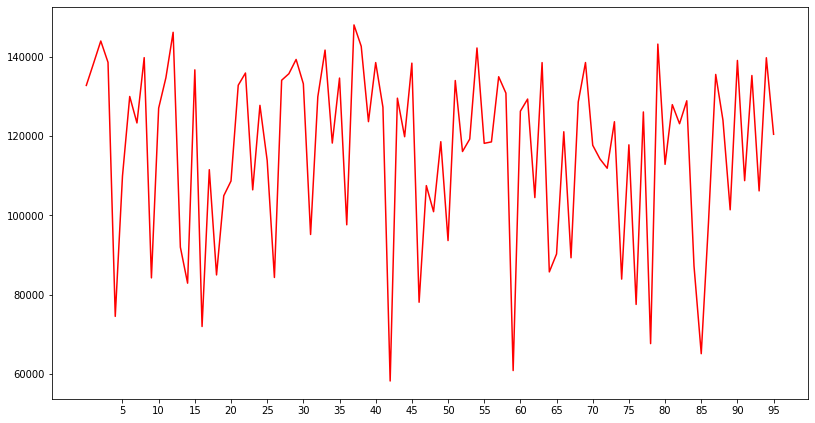

In [10]:
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

png_list=glob.glob("/Users/ShuntaroMiwa/parking_level1/*.jpg")
#png_listに格納されたファイル名を順にpng_file_nameに取り出し、繰り返す

# for png_file_name in png_list:
#     #画像を読み込む
#     img = cv.imread(png_file_name)
#     #座標(661, 267)の画素の青成分の明るさを表示
#     print(img[387][239][2])#96行

data_list_b = []
data_list_g = []
data_list_r = []
comp_list_b = []
comp_list_g = []
comp_list_r = []
for png_file_name in png_list:
    img = cv.imread( png_file_name )
    data_list_b.append( img[211:231,581:601,0] )#96*20*20,400:420,224:244
    data_list_g.append( img[211:231,581:601,1] )
    data_list_r.append( img[211:231,581:601,2] )
    comp_list_b.append( img[216:236,438:458,0] )#96*20*20,400:420,224:244
    comp_list_g.append( img[216:236,438:458,1] )
    comp_list_r.append( img[216:236,438:458,2] )
    
#print(data_list_b)
data_list_b = np.array(data_list_b)
data_list_g = np.array(data_list_g)   
data_list_r =  np.array(data_list_r)
comp_list_b = np.array(comp_list_b)
comp_list_g = np.array(comp_list_g)   
comp_list_r =  np.array(comp_list_r)
print(data_list_b)

data_list_b = (data_list_b-comp_list_b)**2 
data_list_g = (data_list_g-comp_list_g)**2  
data_list_r =  (data_list_r-comp_list_r)**2

#b
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b =  pd.DataFrame(data_list_b)
prinｔ(np.shape(data_list_b))
prinｔ(data_list_b)
#g
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g =  pd.DataFrame(data_list_g)
prinｔ(np.shape(data_list_g))
prinｔ(data_list_g)
#r
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r =  pd.DataFrame(data_list_r)
prinｔ(np.shape(data_list_r))
prinｔ(data_list_r)

data_list_all = data_list_b + data_list_g + data_list_r

# print(np.shape(data_list_b[:,0,0]))
# print(data_list_b[:,0,0])
    
# data_list_b2= []#加工
# data_list_g2 = []
# data_list_r2 = []    
    
# for i in range(20):
#     for j in range(20):
#         data_list_b2.append(data_list_b[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_g2.append(data_list_g[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_r2.append(data_list_r[:,i,j])
        
# data_list_b2 =  pd.DataFrame(data_list_b2).T
# data_list_g2 =  np.array(data_list_g2)   
# data_list_r2 =  np.array(data_list_r2) 

# print(np.shape(data_list_b2[0]))
# print(data_list_b2[0])

fig=plt.figure(figsize=(15, 8)) 
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(left=0.15)

ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
ax1.plot(data_list_all,color='red',label="A")

# ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
# ax2=ax1.twinx().twiny()
# ax3=ax1.twinx().twiny()

# ax1.set_ylabel('blue',fontsize=18 ,color='blue')
# ax2.set_ylabel('green',fontsize=18 ,color='green')
# ax3.set_ylabel('red',fontsize=18 ,color='red') 

# ax1.plot(data_list_b,color='red',label="A")
# ax2.plot(data_list_g,color='green',label="B") 
# ax3.plot(data_list_r,color='blue',label="C") 

# data_list_b.plot(figsize=(10,8), color = blue)
# data_list_g.plot(figsize=(10,8), color = green)
# data_list_r.plot(figsize=(10,8), color = red)
#plt.plot=(data_list_b2)

# # print(np.shape(data_list_b))
# # print(type(data_list_b))

# # import csv
# # #ファイルをオープンして書き込み準備
# # f = open('color_1385_480.csv','w', encoding='UTF-8')
# # writer = csv.writer(f, lineterminator='¥n')
# # #data_list_bをファイルに書き出し
# # writer.writerow(data_list_b)
# # #data_list_gをファイルに書き出し
# # writer.writerow(data_list_g)
# # #data_list_rをファイルに書き出し
# # writer.writerow(data_list_r)
# # #ファイルをクローズして完了
# # f.close()

<class 'numpy.ndarray'>
(96, 1)
          0
0   1548782
1    870901
2   1147812
3    929681
4      5171
..      ...
91  1061199
92   889150
93  1538505
94  1226580
95  1464267

[96 rows x 1 columns]
(96, 1)
          0
0   1092474
1    626280
2    734195
3    657166
4      4773
..      ...
91  1216040
92   544351
93  1400440
94   833048
95  1268036

[96 rows x 1 columns]
(96, 1)
          0
0   1074162
1    605133
2    766128
3    623554
4      4454
..      ...
91  1096899
92   532398
93  1315096
94   821101
95  1238491

[96 rows x 1 columns]


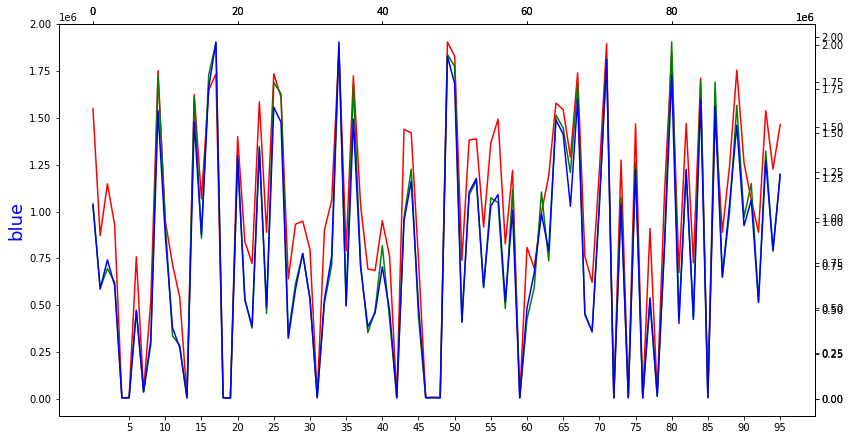

In [16]:
#np.newaxisで次元を上げてブロードキャスト演算
#https://qiita.com/ken_yoshi/items/faf3801506fc28d3e199
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

png_list=glob.glob("/Users/ShuntaroMiwa/parking_level1/*.jpg")
#png_listに格納されたファイル名を順にpng_file_nameに取り出し、繰り返す

# for png_file_name in png_list:
#     #画像を読み込む
#     img = cv.imread(png_file_name)
#     #座標(661, 267)の画素の青成分の明るさを表示
#     print(img[387][239][2])#96行

data_list_b = []
data_list_g = []
data_list_r = []
comp_list_b = []
comp_list_g = []
comp_list_r = []
for png_file_name in png_list:
    img = cv.imread( png_file_name )
    img = np.array(img)
    img = img.astype(np.int64)
    data_list_b.append( img[218:228,589:599,0] )#96*20*20,400:420,224:244
    data_list_g.append( img[218:228,589:599,1] )
    data_list_r.append( img[218:228,589:599,2] )
    comp_list_b.append( img[249:259,532:542,0] )#96*20*20,400:420,224:244
    comp_list_g.append( img[249:259,532:542,1] )
    comp_list_r.append( img[249:259,532:542,2] )

# print(data_list_b)
# print(np.shape(data_list_b))

data_list_b = np.array(data_list_b)
data_list_g = np.array(data_list_g)   
data_list_r =  np.array(data_list_r)
comp_list_b = np.array(comp_list_b)
comp_list_g = np.array(comp_list_g)   
comp_list_r =  np.array(comp_list_r)
# print(data_list_b)
# print(comp_list_b)
#print(np.shape(data_list_b))
print(type(data_list_b))

data_list_b = ((data_list_b - comp_list_b)**2)#**2#**2).sum(axis=1)
data_list_g = ((data_list_g - comp_list_g)**2)
data_list_r = ((data_list_r - comp_list_r)**2)
#print(data_list_b)
# data_list_g = 
# data_list_r =
# print(data_list_b)
# print(np.shape(data_list_b))

# subtract_b = data_list_b-comp_list_b
# subtract_g = data_list_g-comp_list_g
# subtract_r =  data_list_r-comp_list_r
# print(subtract_b)
# print(data_list_g)
# print(data_list_r)

# data_list_b =  data_list_b@data_list_b.T 
# data_list_g =  data_list_g@data_list_g.T   
# data_list_r =  data_list_r@data_list_r.T 

# data_list_b = np.power(subtract_b,2)
# data_list_g = np.power(subtract_g,2)
# data_list_r = np.power(subtract_r,2)

# data_list_b = (data_list_b)**2 
# data_list_g = (data_list_g)**2  
# data_list_r =  (data_list_r)**2

# data_list_b = (data_list_b-comp_list_b)**2 
# data_list_g = (data_list_g-comp_list_g)**2  
# data_list_r =  (data_list_r-comp_list_r)**2

# data_list_b = np.dot(data_list_b-comp_list_b,data_list_b-comp_list_b)
# data_list_g = np.dot(data_list_g-comp_list_g,data_list_g-comp_list_g)
# data_list_r =  np.dot(data_list_r-comp_list_r,data_list_r-comp_list_r)

# data_list_b = np.dot(data_list_b,data_list_b)
# data_list_g = np.dot(data_list_g,data_list_g)
# data_list_r =  np.dot(data_list_r,data_list_r)
# print(data_list_b)

#b
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b =  pd.DataFrame(data_list_b)
prinｔ(np.shape(data_list_b))
prinｔ(data_list_b)
#g
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g =  pd.DataFrame(data_list_g)
prinｔ(np.shape(data_list_g))
prinｔ(data_list_g)
#r
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r =  pd.DataFrame(data_list_r)
prinｔ(np.shape(data_list_r))
prinｔ(data_list_r)

data_list_all = data_list_b + data_list_g + data_list_r

# print(np.shape(data_list_b[:,0,0]))
# print(data_list_b[:,0,0])
    
# data_list_b2= []#加工
# data_list_g2 = []
# data_list_r2 = []    
    
# for i in range(20):
#     for j in range(20):
#         data_list_b2.append(data_list_b[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_g2.append(data_list_g[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_r2.append(data_list_r[:,i,j])
        
# data_list_b2 =  pd.DataFrame(data_list_b2).T
# data_list_g2 =  np.array(data_list_g2)   
# data_list_r2 =  np.array(data_list_r2) 

# print(np.shape(data_list_b2[0]))
# print(data_list_b2[0])

fig=plt.figure(figsize=(15, 8)) 
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(left=0.15)

#合計
# ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
# ax1.plot(data_list_all,color='red',label="A")

#各色
ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
ax2=ax1.twinx().twiny()
ax3=ax1.twinx().twiny()
ax1.set_ylabel('blue',fontsize=18 ,color='blue')
ax2.set_ylabel('green',fontsize=18 ,color='green')
ax3.set_ylabel('red',fontsize=18 ,color='red') 
ax1.plot(data_list_b,color='red',label="A")
ax2.plot(data_list_g,color='green',label="B") 
ax3.plot(data_list_r,color='blue',label="C") 

# data_list_b.plot(figsize=(10,8), color = blue)
# data_list_g.plot(figsize=(10,8), color = green)
# data_list_r.plot(figsize=(10,8), color = red)
#plt.plot=(data_list_b2)

# # print(np.shape(data_list_b))
# # print(type(data_list_b))

# # import csv
# # #ファイルをオープンして書き込み準備
# # f = open('color_1385_480.csv','w', encoding='UTF-8')
# # writer = csv.writer(f, lineterminator='¥n')
# # #data_list_bをファイルに書き出し
# # writer.writerow(data_list_b)
# # #data_list_gをファイルに書き出し
# # writer.writerow(data_list_g)
# # #data_list_rをファイルに書き出し
# # writer.writerow(data_list_r)
# # #ファイルをクローズして完了
# # f.close()

<class 'numpy.ndarray'>
[[[18225 17424 18225 ...   196  2209  1089]
  [16129 17424 17689 ...  5776    25  2116]
  [17161 16900 17424 ...  7396  6084  1024]
  ...
  [17424 17424 17956 ... 18225 17161 17689]
  [17956 17956 17956 ... 18496 18769 18225]
  [17956 17956 17956 ... 16900 18769 18769]]

 [[ 2025  1764    16 ...   289   484   361]
  [ 1764  2500  3721 ...  1936   400   225]
  [ 2601  2401  3249 ...  3721  1600   169]
  ...
  [ 3249  3249  3025 ...  2601  5041  2025]
  [ 3249  3025  2916 ...  3249  2500  4096]
  [ 2916  2809  2704 ...  2916  3364  2704]]

 [[ 1764  1936  7921 ...   729   841   900]
  [  784  1444  2209 ...  1156  1089  1156]
  [  784  1225   361 ...  2304  1681  1296]
  ...
  [ 1936  1849  2401 ...  6400    64  3600]
  [ 1369  2116  2916 ...  4225  5929  7225]
  [ 1936  2500  3364 ...  3721  4356  4489]]

 ...

 [[  144  2025  2304 ...   361   676  3364]
  [ 2809  1296   484 ...   324   169   484]
  [ 1444   900   625 ...   324   400   196]
  ...
  [  400  1156  

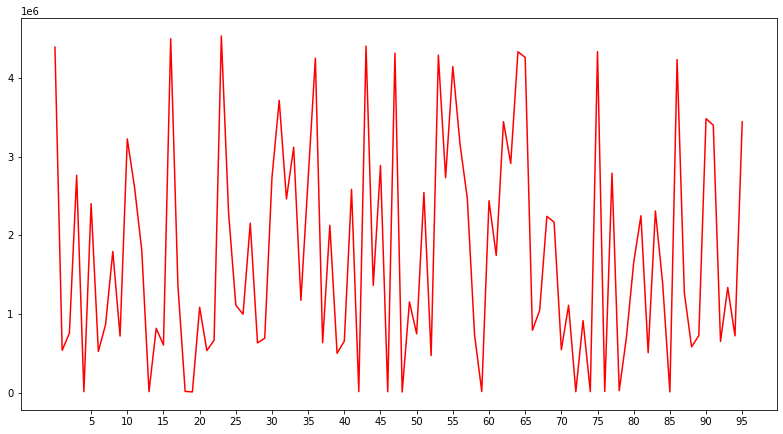

In [10]:
#np.newaxisで次元を上げてブロードキャスト演算
#https://qiita.com/ken_yoshi/items/faf3801506fc28d3e199
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

png_list=glob.glob("/Users/ShuntaroMiwa/parking_level1/*.jpg")
#png_listに格納されたファイル名を順にpng_file_nameに取り出し、繰り返す

# for png_file_name in png_list:
#     #画像を読み込む
#     img = cv.imread(png_file_name)
#     #座標(661, 267)の画素の青成分の明るさを表示
#     print(img[387][239][2])#96行

data_list_b = []
data_list_g = []
data_list_r = []
comp_list_b = []
comp_list_g = []
comp_list_r = []
for png_file_name in png_list:
    img = cv.imread( png_file_name )
    img = np.array(img)
    img = img.astype(np.int64)
    data_list_b.append( img[164:174,532:542,0] )#96*20*20
    data_list_g.append( img[164:174,532:542,1] )
    data_list_r.append( img[164:174,532:542,2] )
    comp_list_b.append( img[249:259,532:542,0] )#96*20*20
    comp_list_g.append( img[249:259,532:542,1] )
    comp_list_r.append( img[249:259,532:542,2] )

# print(data_list_b)
# print(np.shape(data_list_b))

data_list_b = np.array(data_list_b)
data_list_g = np.array(data_list_g)   
data_list_r =  np.array(data_list_r)
comp_list_b = np.array(comp_list_b)
comp_list_g = np.array(comp_list_g)   
comp_list_r =  np.array(comp_list_r)
# print(data_list_b)
# print(comp_list_b)
#print(np.shape(data_list_b))
print(type(data_list_b))

data_list_b = ((data_list_b - comp_list_b)**2)#**2#**2).sum(axis=1)
data_list_g = ((data_list_g - comp_list_g)**2)
data_list_r = ((data_list_r - comp_list_r)**2)
#print(data_list_b)
# data_list_g = 
# data_list_r =
# print(data_list_b)
# print(np.shape(data_list_b))

# subtract_b = data_list_b-comp_list_b
# subtract_g = data_list_g-comp_list_g
# subtract_r =  data_list_r-comp_list_r
# print(subtract_b)
# print(data_list_g)
# print(data_list_r)

# data_list_b =  data_list_b@data_list_b.T 
# data_list_g =  data_list_g@data_list_g.T   
# data_list_r =  data_list_r@data_list_r.T 

# data_list_b = np.power(subtract_b,2)
# data_list_g = np.power(subtract_g,2)
# data_list_r = np.power(subtract_r,2)

# data_list_b = (data_list_b)**2 
# data_list_g = (data_list_g)**2  
# data_list_r =  (data_list_r)**2

# data_list_b = (data_list_b-comp_list_b)**2 
# data_list_g = (data_list_g-comp_list_g)**2  
# data_list_r =  (data_list_r-comp_list_r)**2

# data_list_b = np.dot(data_list_b-comp_list_b,data_list_b-comp_list_b)
# data_list_g = np.dot(data_list_g-comp_list_g,data_list_g-comp_list_g)
# data_list_r =  np.dot(data_list_r-comp_list_r,data_list_r-comp_list_r)

# data_list_b = np.dot(data_list_b,data_list_b)
# data_list_g = np.dot(data_list_g,data_list_g)
# data_list_r =  np.dot(data_list_r,data_list_r)
# print(data_list_b)

#b
print(data_list_b)
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b = np.sum(data_list_b, axis=1) 
data_list_b =  pd.DataFrame(data_list_b)
# prinｔ(np.shape(data_list_b))
# prinｔ(data_list_b)
#g
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g = np.sum(data_list_g, axis=1) 
data_list_g =  pd.DataFrame(data_list_g)
# prinｔ(np.shape(data_list_g))
# prinｔ(data_list_g)
#r
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r = np.sum(data_list_r, axis=1) 
data_list_r =  pd.DataFrame(data_list_r)
# prinｔ(np.shape(data_list_r))
# prinｔ(data_list_r)

data_list_all = data_list_b + data_list_g + data_list_r

# print(np.shape(data_list_b[:,0,0]))
# print(data_list_b[:,0,0])
    
# data_list_b2= []#加工
# data_list_g2 = []
# data_list_r2 = []    
    
# for i in range(20):
#     for j in range(20):
#         data_list_b2.append(data_list_b[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_g2.append(data_list_g[:,i,j])

# for i in range(20):
#     for j in range(20):
#         data_list_r2.append(data_list_r[:,i,j])
        
# data_list_b2 =  pd.DataFrame(data_list_b2).T
# data_list_g2 =  np.array(data_list_g2)   
# data_list_r2 =  np.array(data_list_r2) 

# print(np.shape(data_list_b2[0]))
# print(data_list_b2[0])

fig=plt.figure(figsize=(15, 8)) 
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(left=0.15)

#合計
ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
ax1.plot(data_list_all,color='red',label="A")

#各色
# ax1=fig.add_subplot(1,1,1, xticks=[5, 10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
# ax2=ax1.twinx().twiny()
# ax3=ax1.twinx().twiny()
# ax1.set_ylabel('blue',fontsize=18 ,color='blue')
# ax2.set_ylabel('green',fontsize=18 ,color='green')
# ax3.set_ylabel('red',fontsize=18 ,color='red') 
# ax1.plot(data_list_b,color='red',label="A")
# ax2.plot(data_list_g,color='green',label="B") 
# ax3.plot(data_list_r,color='blue',label="C") 

# data_list_b.plot(figsize=(10,8), color = blue)
# data_list_g.plot(figsize=(10,8), color = green)
# data_list_r.plot(figsize=(10,8), color = red)
#plt.plot=(data_list_b2)

# # print(np.shape(data_list_b))
# # print(type(data_list_b))

# # import csv
# # #ファイルをオープンして書き込み準備
# # f = open('color_1385_480.csv','w', encoding='UTF-8')
# # writer = csv.writer(f, lineterminator='¥n')
# # #data_list_bをファイルに書き出し
# # writer.writerow(data_list_b)
# # #data_list_gをファイルに書き出し
# # writer.writerow(data_list_g)
# # #data_list_rをファイルに書き出し
# # writer.writerow(data_list_r)
# # #ファイルをクローズして完了
# # f.close()

In [7]:
print(np.arange(0,96,1))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
